#IMAGE CLASSIFICATION (ROCK PAPER SCISSORS GAME)

#####Nama: Felicia
#####E-mail: flcastk@gmail.com
#####Alamat: Sunter, Jakarta Utara

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import zipfile, os

local_zip = '/content/drive/MyDrive/dicoding/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/dicoding/rockpaperscissors')
zip_ref.close()

In [4]:
os.listdir('/content/drive/MyDrive/dicoding/rockpaperscissors/rockpaperscissors')

['__MACOSX',
 'rockpaperscissors',
 'paper',
 'rock',
 'rps-cv-images',
 'scissors',
 'README_rpc-cv-images.txt']

In [5]:
base_dir = '/content/drive/MyDrive/dicoding/rockpaperscissors/rockpaperscissors/rps-cv-images'

In [6]:
rock = os.path.join('/content/drive/MyDrive/dicoding/rockpaperscissors/rockpaperscissors/rock')
paper = os.path.join('/content/drive/MyDrive/dicoding/rockpaperscissors/rockpaperscissors/paper')
scissors = os.path.join('/content/drive/MyDrive/dicoding/rockpaperscissors/rockpaperscissors/scissors')

In [7]:
train_rock = os.listdir(rock)
train_paper = os.listdir(paper)
train_scissors = os.listdir(scissors)

print(len(train_rock))
print(len(train_paper))
print(len(train_scissors))

726
712
750


#Data Pre-Procesing

##Image Augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)
test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        shuffle=True,
        batch_size=4,
        class_mode='categorical',
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        shuffle=True,
        batch_size=4, 
        class_mode='categorical',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


#Sequential Model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

#Early Stopping

In [13]:
threshold = 0.97
class MyCallback(tf.keras.callbacks.Callback) :
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=threshold):
      print('\nStop Training')
      self.model.stop_training = True

In [14]:
callbacks = MyCallback()

#Model Fitting

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
    callbacks=[callbacks])

Epoch 1/20
25/25 - 11s - loss: 1.1548 - accuracy: 0.3300 - val_loss: 1.1129 - val_accuracy: 0.1500 - 11s/epoch - 432ms/step
Epoch 2/20
25/25 - 9s - loss: 1.0927 - accuracy: 0.3900 - val_loss: 1.0479 - val_accuracy: 0.3500 - 9s/epoch - 355ms/step
Epoch 3/20
25/25 - 10s - loss: 0.9488 - accuracy: 0.6100 - val_loss: 0.9228 - val_accuracy: 0.6000 - 10s/epoch - 414ms/step
Epoch 4/20
25/25 - 9s - loss: 0.7066 - accuracy: 0.6800 - val_loss: 0.4102 - val_accuracy: 0.8500 - 9s/epoch - 355ms/step
Epoch 5/20
25/25 - 9s - loss: 0.4828 - accuracy: 0.8000 - val_loss: 0.2076 - val_accuracy: 0.9500 - 9s/epoch - 355ms/step
Epoch 6/20
25/25 - 9s - loss: 0.3750 - accuracy: 0.8700 - val_loss: 0.6820 - val_accuracy: 0.7000 - 9s/epoch - 355ms/step
Epoch 7/20
25/25 - 9s - loss: 0.5816 - accuracy: 0.7400 - val_loss: 1.0865 - val_accuracy: 0.6000 - 9s/epoch - 358ms/step
Epoch 8/20
25/25 - 11s - loss: 0.6620 - accuracy: 0.7700 - val_loss: 0.7446 - val_accuracy: 0.6000 - 11s/epoch - 450ms/step
Epoch 9/20
25/25 -

#Accuracy and Loss Plot

Text(0.5, 1.0, 'Accuracy')

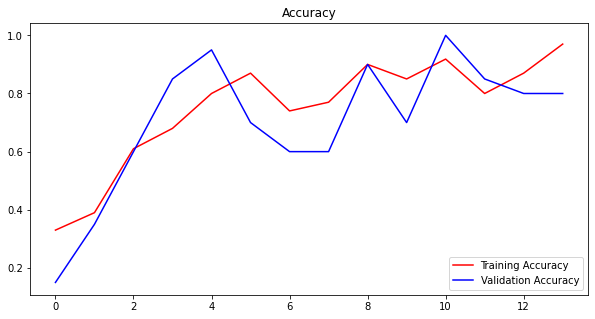

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch = range(len(acc))

plt.plot(epoch, acc, 'r', label='Training Accuracy')
plt.plot(epoch, val_acc, 'b', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

Text(0.5, 1.0, 'Loss')

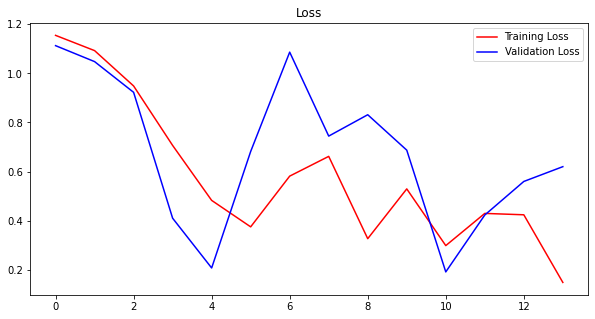

In [17]:
plt.figure(figsize=(10,5))

loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(len(loss))

plt.plot(epoch, loss, 'r', label='Training Loss')
plt.plot(epoch, val_loss, 'b', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')

#Image Prediction

Saving 0Ug54ifXRqqlZS2Z.png to 0Ug54ifXRqqlZS2Z (1).png
0Ug54ifXRqqlZS2Z.png
scissors


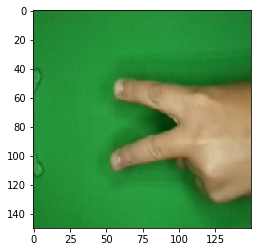

In [19]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes[0,0]==1:
   print('paper')
  elif classes[0,1]==1:
   print('rock')
  else:
   print('scissors')